# *Aya Shibbi -- Senior Project - 2024*

# **Voice-To-Text Emotion Detection**
*Balanced + Lemmatized Text*

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# balanced - lemmatized text
my_csv_lem = "/content/drive/MyDrive/AyaShibbi_SeniorProject_2024_LIU/Part2_Emotion_Detection/Datasets/Balanced/Preprocessed_Text/balanced_lemmatized_text_ds.csv"

Mounted at /content/drive


In [2]:
# install toolkit
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from wordcloud import WordCloud
from collections import Counter

In [4]:
# load the nonlemmatized dataset from the CSV file into a pandas DataFrame
csv_lem = pd.read_csv(my_csv_lem)
df_lem = pd.DataFrame(csv_lem)

## **2. Emotion Detection**

### Exploratory Data Analysis (EDA)

In [5]:
# view all data in the dataframe
print(df_lem)

                                                   text  label description  \
0                               i didnt feel humiliated      0         sad   
1     i can go from feeling so hopeless to so damned...      0         sad   
2      im grabbing a minute to post i feel greedy wrong      3       anger   
3     i am ever feeling nostalgic about the fireplac...      2        love   
4                                  i am feeling grouchy      3       anger   
...                                                 ...    ...         ...   
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                                           cleaned_text  \
0   

In [6]:
# information about the data
print(df_lem.info)

<bound method DataFrame.info of                                                    text  label description  \
0                               i didnt feel humiliated      0         sad   
1     i can go from feeling so hopeless to so damned...      0         sad   
2      im grabbing a minute to post i feel greedy wrong      3       anger   
3     i am ever feeling nostalgic about the fireplac...      2        love   
4                                  i am feeling grouchy      3       anger   
...                                                 ...    ...         ...   
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                               

In [7]:
# view columns
print(df_lem.columns)

Index(['text', 'label', 'description', 'cleaned_text', 'filtered_text',
       'lemmatized_text'],
      dtype='object')


In [8]:
# number of records and features
print(df_lem.shape)

(9226, 6)


In [9]:
# number of null values
print(df_lem.isnull().sum())

text               0
label              0
description        0
cleaned_text       0
filtered_text      0
lemmatized_text    0
dtype: int64


In [10]:
# view first 5 rows
print(df_lem.head())

                                                text  label description  \
0                            i didnt feel humiliated      0         sad   
1  i can go from feeling so hopeless to so damned...      0         sad   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                        cleaned_text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                       filtered_text  \
0                              didnt feel humiliated   
1  go feeling hopeless damned hopeful around some...   
2          im grabbing minute post feel gree

In [11]:
# view last 5 rows
print(df_lem.tail())

                                                   text  label description  \
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                                           cleaned_text  \
9221  i like the feel of the game but im not very fo...   
9222  im feeling a little tender and mashed today an...   
9223  i can feel all supportive and jrock ish in sch...   
9224  i feel like i got to know her a bit and what i...   
9225  i feel i should make is how surprised but ente...   

                                          filtered_text  \
9221                like feel game im fond color scheme   
9222      im feeling little tender mashed today im best   

In [12]:
# average word count
average_word_count = df_lem['lemmatized_text'].str.split().str.len().mean()
print(f"Average Word Count per Text: {average_word_count:.2f}")

Average Word Count per Text: 9.43


In [13]:
# emotion distribution
number_emotion_distribution = df_lem['description'].value_counts()
percentage_emotion_distribution = df_lem['description'].value_counts(normalize = True)

print(number_emotion_distribution) # numbers
print("-" * 30)
print(percentage_emotion_distribution) # percentages

description
joy         1888
fear        1741
sad         1672
love        1641
anger       1565
surprise     719
Name: count, dtype: int64
------------------------------
description
joy         0.204639
fear        0.188706
sad         0.181227
love        0.177867
anger       0.169629
surprise    0.077932
Name: proportion, dtype: float64


#### Emotion Distribution Visualization

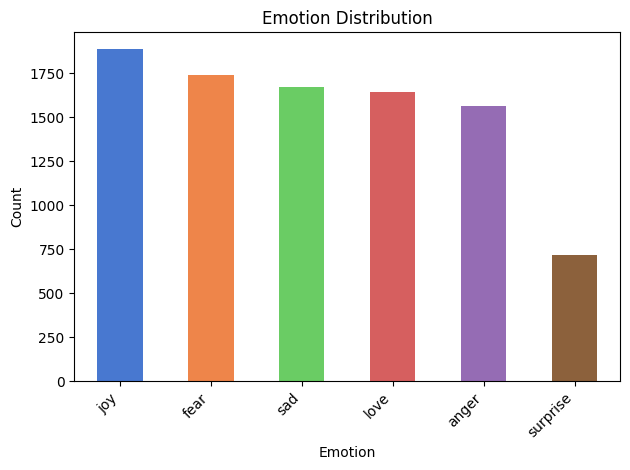

In [14]:
# create the bar chart
number_emotion_distribution.plot(kind='bar', color=sns.color_palette("muted"))
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()

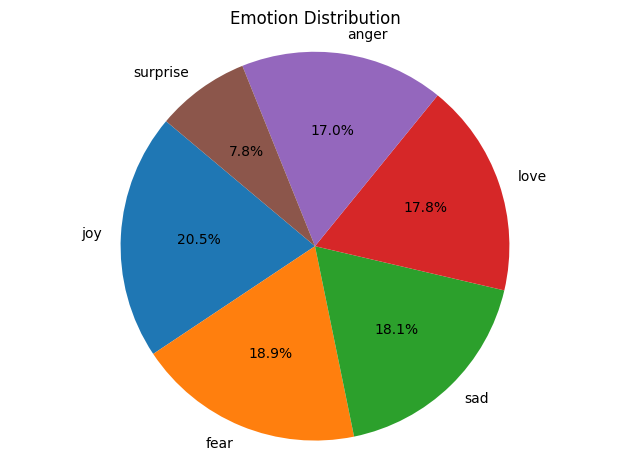

In [15]:
# create the pie chart
plt.pie(percentage_emotion_distribution, labels=percentage_emotion_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Emotion Distribution")
plt.axis('equal')  # equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

#### Overall Text Length Distribution

In [16]:
# text length for each text (count characters)
text_lengths = df_lem['lemmatized_text'].str.len()

print(text_lengths[:5])

0    20
1    60
2    37
3    52
4    15
Name: lemmatized_text, dtype: int64


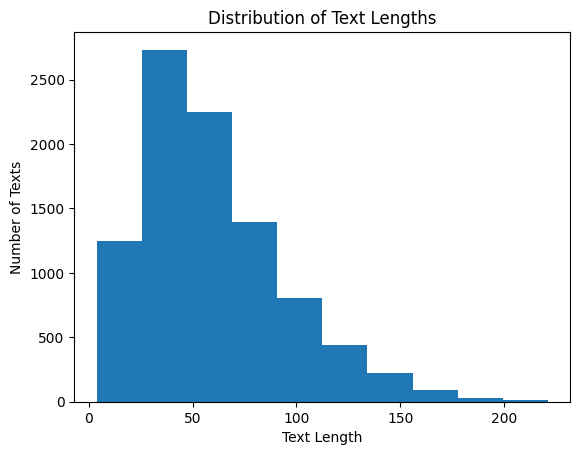

In [17]:
# Create the histogram
plt.hist(text_lengths)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths")
plt.show()

In [18]:
# print the mean text length (count characters)
mean_text_length = text_lengths.mean()
print(f"Mean Text Length: {mean_text_length:.2f}")

Mean Text Length: 59.98


<ipython-input-19-2af9cc181816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


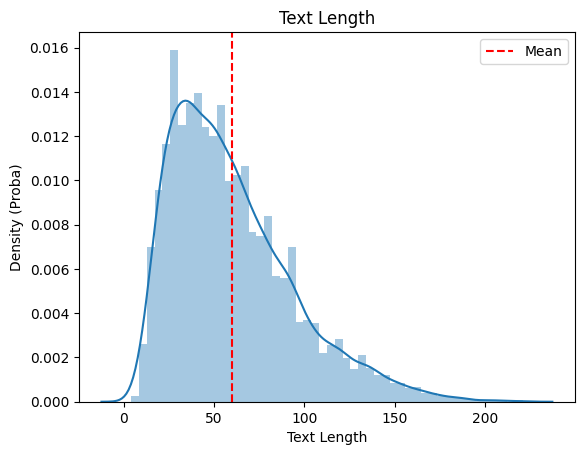

In [19]:
# Create the distplot of Text Length
sns.distplot(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Density (Proba)')
plt.title('Text Length')
plt.axvline(mean_text_length, color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.show()

#### Word Frequency Per Text

In [20]:
# find the text length and word count of each record
text_word_count = df_lem['lemmatized_text'].apply(lambda x: len(str(x).split())) # words

print(text_word_count[:5])

0    3
1    9
2    7
3    7
4    2
Name: lemmatized_text, dtype: int64


In [21]:
# print the mean text word count
mean_text_word_count = text_word_count.mean()
print(f"Mean Text Word Count: {mean_text_word_count:.2f}")

Mean Text Word Count: 9.43


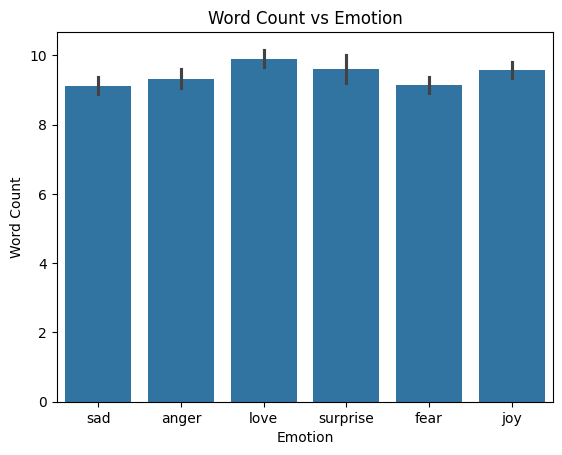

In [22]:
# Create the barplot of Text Word Count
sns.barplot(x = df_lem['description'], y = text_word_count)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.title('Word Count vs Emotion')
plt.show()

#### **Tokenization**

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
# tokenization
tokenized_text = []

for sentence in df_lem['lemmatized_text']:
  tokens = nltk.word_tokenize(sentence)
  tokenized_text.append(tokens)

print(tokenized_text[:5])

[['didnt', 'feel', 'humiliate'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'care', 'awake'], ['im', 'grab', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]


#### Word Frequency vs. Emotion

In [25]:
from collections import Counter
def get_word_frequencies(text_list):
  word_counts = Counter()
  for text in text_list:
    word_counts.update(text)
  return word_counts

# Get word frequencies for all text
word_freqs = get_word_frequencies(tokenized_text)

print(word_freqs)

Counter({'feel': 6624, 'feeling': 3169, 'like': 1754, 'im': 1383, 'get': 617, 'know': 578, 'make': 571, 'time': 554, 'really': 543, 'want': 532, 'love': 506, 'little': 498, 'people': 411, 'thing': 381, 'one': 374, 'still': 368, 'day': 367, 'would': 362, 'life': 345, 'bit': 342, 'go': 340, 'way': 338, 'think': 335, 'even': 334, 'ive': 319, 'need': 307, 'say': 299, 'something': 297, 'much': 280, 'dont': 277, 'going': 271, 'could': 268, 'try': 243, 'back': 238, 'work': 222, 'always': 215, 'start': 212, 'see': 212, 'come': 211, 'around': 203, 'good': 202, 'also': 198, 'friend': 191, 'right': 188, 'pretty': 183, 'help': 182, 'take': 182, 'year': 171, 'though': 171, 'amaze': 171, 'cant': 169, 'today': 168, 'someone': 167, 'felt': 160, 'didnt': 157, 'thought': 157, 'lot': 156, 'look': 156, 'many': 155, 'never': 154, 'tell': 149, 'find': 147, 'remember': 144, 'overwhelm': 141, 'well': 140, 'strange': 140, 'every': 138, 'enough': 138, 'use': 135, 'write': 132, 'quite': 131, 'weird': 131, 'kind'

In [26]:
# Group words by emotion
emotion_word_freqs = {}
for emotion in df_lem['description'].unique():
  df_emotion = df_lem[df_lem['description'] == emotion]
  emotion_word_freqs[emotion] = get_word_frequencies(tokenized_text)

# Prepare data for visualization (adjust based on your needs)
top_n_words = 10  # Number of top words to visualize
emotions = list(emotion_word_freqs.keys())

word_data = []
for emotion, word_freq in emotion_word_freqs.items():
  top_words = word_freq.most_common(top_n_words)  # Get top words for this emotion
  word_data.append([word for word, _ in top_words])  # Extract just words

In [27]:
from wordcloud import WordCloud

# Create word clouds for each emotion
for emotion, word_freq in emotion_word_freqs.items():
  word_cloud = WordCloud(width=800, height=600).generate_from_frequencies(word_freq)
  plt.figure(figsize=(8, 6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {emotion} Text')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### N-Gram Analysis

In [28]:
# creating individual dataframes of different emotions
sadness = df_lem[df_lem['label']==0]['lemmatized_text']
joy = df_lem[df_lem['label']==1]['lemmatized_text']
love = df_lem[df_lem['label']==2]['lemmatized_text']
anger = df_lem[df_lem['label']==3]['lemmatized_text']
fear = df_lem[df_lem['label']==4]['lemmatized_text']
surprise = df_lem[df_lem['label']==5]['lemmatized_text']

In [29]:
# code to calculate ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

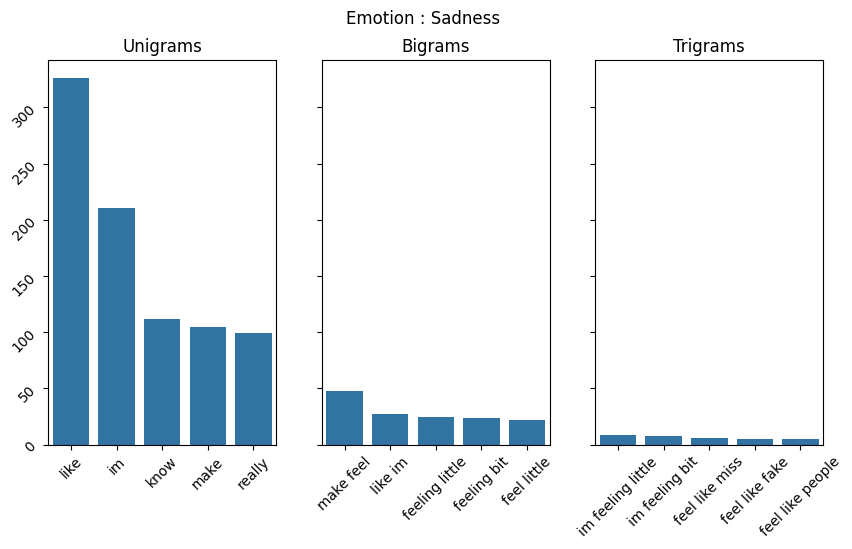

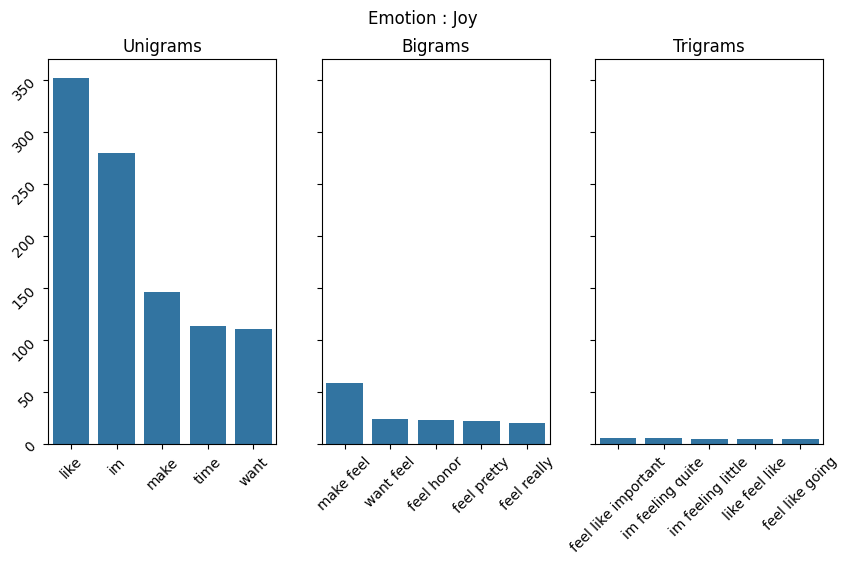

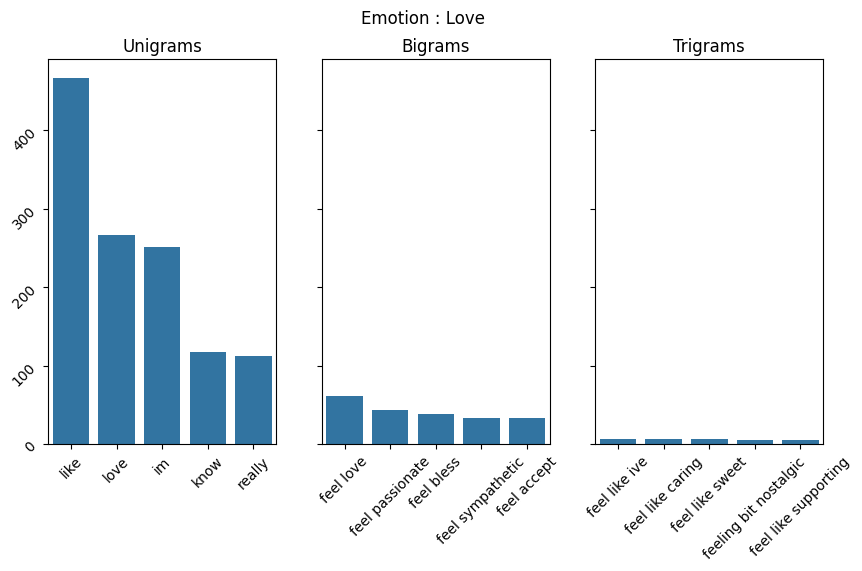

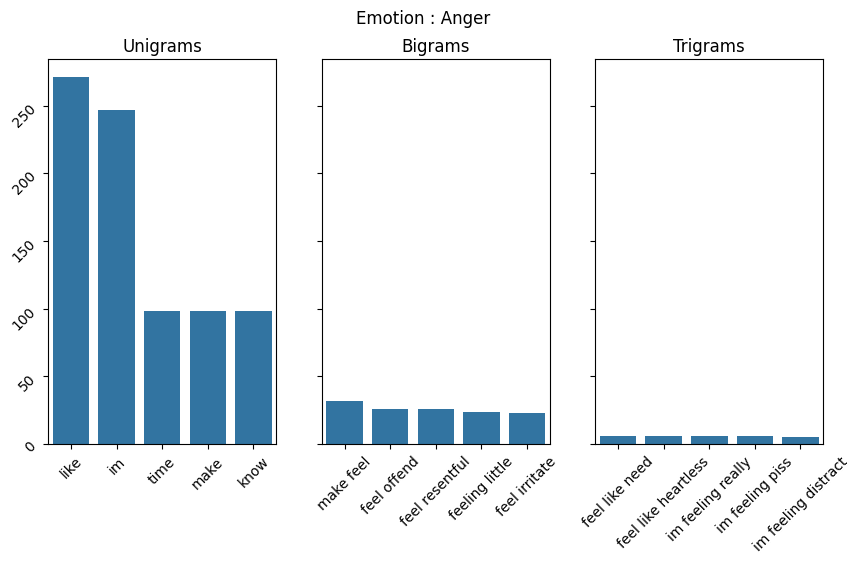

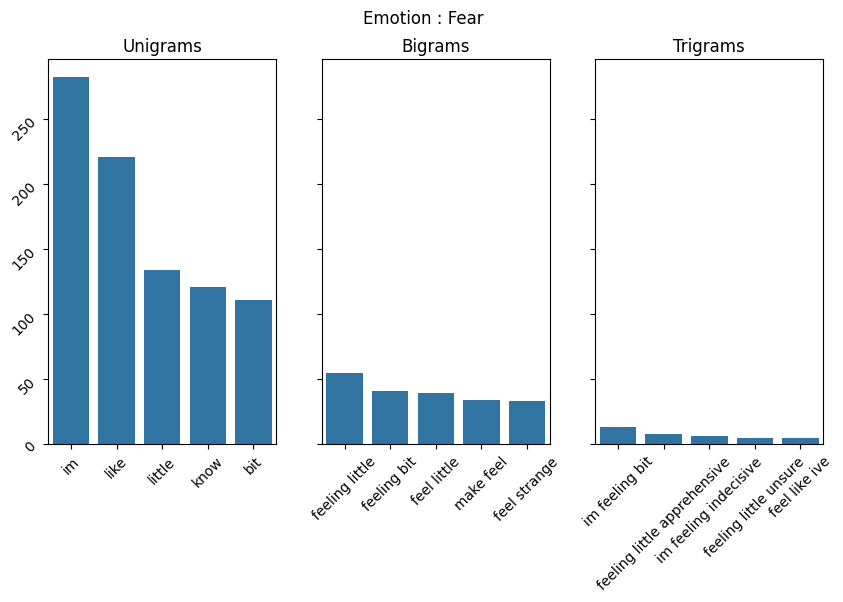

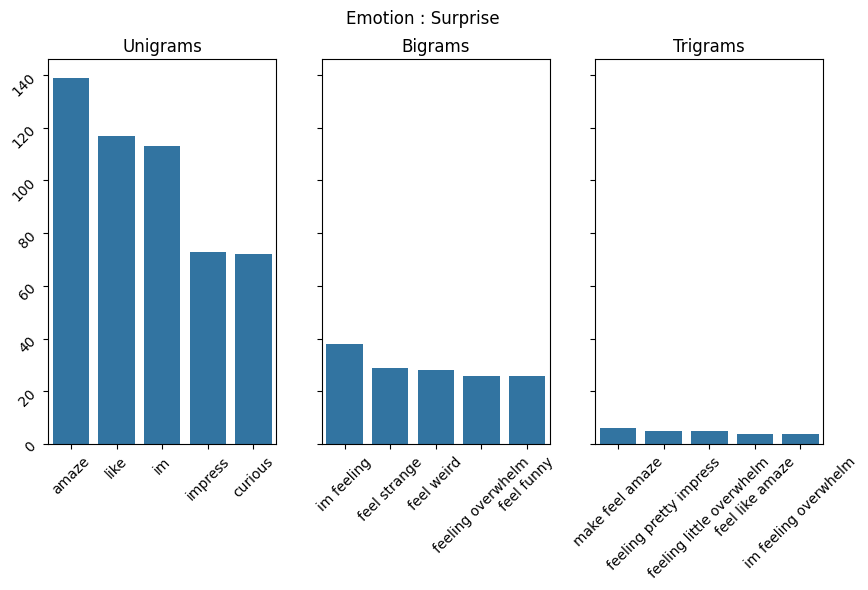

In [31]:
# visualizing the ngrams for the emotions
#Sadness
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Fear
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('fear.png')


#Surprise
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('suprise.png')

### **Vectorization (convert text to numerical values)**

In [32]:
lemmatized_text_data = df_lem['lemmatized_text']

#### CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# unigram --> 1
countVectorizer_n1 = CountVectorizer()

In [35]:
# unigram & bigram --> 1 & 2
countVectorizer_n2 = CountVectorizer(ngram_range= (1,2))

In [36]:
# bigram --> 2
countVectorizer_n3 = CountVectorizer(ngram_range= (2,2))

##### Unigram

In [37]:
countVectorizer_n1.fit(lemmatized_text_data)
X_CV_n1_lem = countVectorizer_n1.transform(lemmatized_text_data)

print(X_CV_n1_lem.shape)

(9226, 9035)


##### Unigram and Bigram

In [38]:
countVectorizer_n2.fit(lemmatized_text_data)
X_CV_n2_lem = countVectorizer_n2.transform(lemmatized_text_data)

print(X_CV_n2_lem.shape)

(9226, 65673)


##### Bigram

In [39]:
countVectorizer_n3.fit(lemmatized_text_data)
X_CV_n3_lem = countVectorizer_n3.transform(lemmatized_text_data)

print(X_CV_n3_lem.shape)

(9226, 56638)


#### TfidfVectorizer (Term Frequency-Inverse Document Frequency)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# unigram --> 1
tfidfVectorizer_n1 = TfidfVectorizer()

In [42]:
# unigram & bigram --> 1 & 2
tfidfVectorizer_n2 = TfidfVectorizer(ngram_range= (1,2))

In [43]:
# bigram --> 2
tfidfVectorizer_n3 = TfidfVectorizer(ngram_range= (2,2))

##### Unigram

In [44]:
tfidfVectorizer_n1.fit(lemmatized_text_data)
X_TfIdf_n1_lem = tfidfVectorizer_n1.transform(lemmatized_text_data)

print(X_TfIdf_n1_lem.shape)

(9226, 9035)


##### Unigram and Bigram

In [45]:
tfidfVectorizer_n2.fit(lemmatized_text_data)
X_TfIdf_n2_lem = tfidfVectorizer_n2.transform(lemmatized_text_data)

print(X_TfIdf_n2_lem.shape)

(9226, 65673)


##### Bigram

In [46]:
tfidfVectorizer_n3.fit(lemmatized_text_data)
X_TfIdf_n3_lem = tfidfVectorizer_n3.transform(lemmatized_text_data)

print(X_TfIdf_n3_lem.shape)

(9226, 56638)


### **Training Model -- Traditional ML Algorithms**

In [47]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [48]:
# split X and y into training and testing sets
def split_X_y(X):
  X = X
  y = df_lem['label']

  # split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

  return X_train, X_test, y_train, y_test

In [49]:
def confusion_matrix(cnf_matrix):
  class_names=[0, 1, 2, 3, 4, 5] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#### *Naive Bayes*

In [50]:
# import NB model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

In [51]:
def NB_model(X_train, y_train, X_test):
  # feature selection
  selector = SelectKBest(chi2, k=1000)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)

  # create a naive bayes classifier
  nb = MultinomialNB(alpha=0.1)

  # train the model using the training sets
  nb.fit(X_train_selected, y_train)

  y_pred = nb.predict(X_test_selected)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [52]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [53]:
y_pred = NB_model(X_train, y_train, X_test)

In [54]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[273  11   9  20  16   3]
 [ 10 319  37   9  12   8]
 [  6  25 288   5   5   1]
 [  9   5   7 262  11   4]
 [  8  12   5  13 290  12]
 [  4   4   0   2  38 103]]


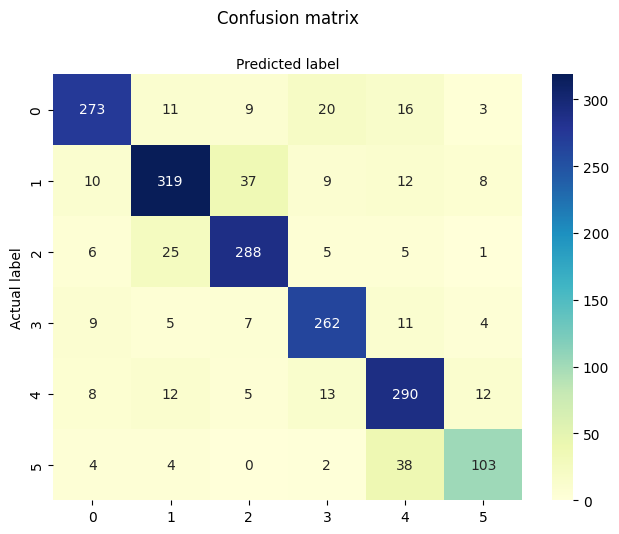

In [55]:
confusion_matrix(cnf_matrix)

In [56]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.82      0.85       332
     Sadness       0.85      0.81      0.83       395
       Anger       0.83      0.87      0.85       330
        Fear       0.84      0.88      0.86       298
        Love       0.78      0.85      0.81       340
   Surprised       0.79      0.68      0.73       151

    accuracy                           0.83      1846
   macro avg       0.83      0.82      0.82      1846
weighted avg       0.83      0.83      0.83      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [57]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [58]:
y_pred = NB_model(X_train, y_train, X_test)

In [59]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[289   8   5  14  15   1]
 [  9 328  32   7  14   5]
 [  3  18 303   2   4   0]
 [  3   6   7 274   7   1]
 [  6   8   3   7 288  28]
 [  1   2   0   3  15 130]]


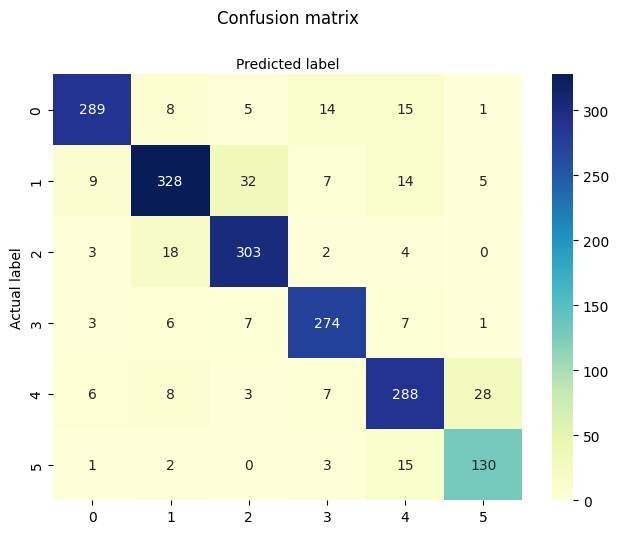

In [60]:
confusion_matrix(cnf_matrix)

In [61]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.87      0.90       332
     Sadness       0.89      0.83      0.86       395
       Anger       0.87      0.92      0.89       330
        Fear       0.89      0.92      0.91       298
        Love       0.84      0.85      0.84       340
   Surprised       0.79      0.86      0.82       151

    accuracy                           0.87      1846
   macro avg       0.87      0.87      0.87      1846
weighted avg       0.87      0.87      0.87      1846



##### CounterVectorizer -- Bigram(n3)

In [62]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [63]:
y_pred = NB_model(X_train, y_train, X_test)

In [64]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[133 155  10  13  21   0]
 [  1 357  15   6  13   3]
 [  3 157 154   5  10   1]
 [  0 111  10 162  12   3]
 [  3  94   8   8 224   3]
 [  3  45   3   2  35  63]]


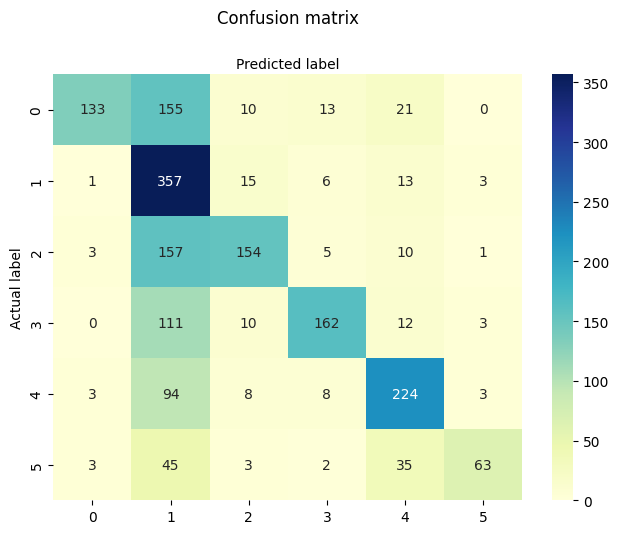

In [65]:
confusion_matrix(cnf_matrix)

In [66]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.40      0.56       332
     Sadness       0.39      0.90      0.54       395
       Anger       0.77      0.47      0.58       330
        Fear       0.83      0.54      0.66       298
        Love       0.71      0.66      0.68       340
   Surprised       0.86      0.42      0.56       151

    accuracy                           0.59      1846
   macro avg       0.75      0.57      0.60      1846
weighted avg       0.72      0.59      0.60      1846



##### TfidfVectorizer -- Unigram(n1)

In [67]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [68]:
y_pred = NB_model(X_train, y_train, X_test)

In [69]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  10   6  14  19   0]
 [  7 334  38   6  10   0]
 [  6  25 288   7   3   1]
 [  9   9   7 261  11   1]
 [  9  14   7  10 296   4]
 [ 13  23   3   7  42  63]]


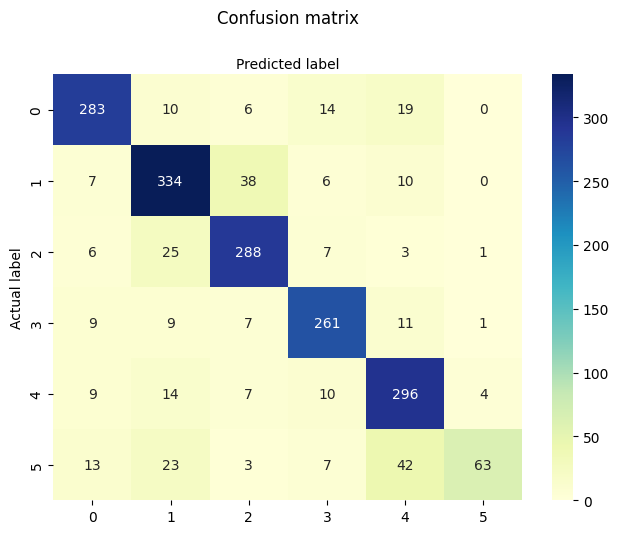

In [70]:
confusion_matrix(cnf_matrix)

In [71]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.87      0.85      0.86       332
     Sadness       0.80      0.85      0.82       395
       Anger       0.83      0.87      0.85       330
        Fear       0.86      0.88      0.87       298
        Love       0.78      0.87      0.82       340
   Surprised       0.91      0.42      0.57       151

    accuracy                           0.83      1846
   macro avg       0.84      0.79      0.80      1846
weighted avg       0.83      0.83      0.82      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [72]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [73]:
y_pred = NB_model(X_train, y_train, X_test)

In [74]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[291  18   3  10  10   0]
 [  4 356  27   3   3   2]
 [  2  22 304   1   1   0]
 [  3  12   1 273   9   0]
 [  5  11   1   5 317   1]
 [ 11  29   1   2  47  61]]


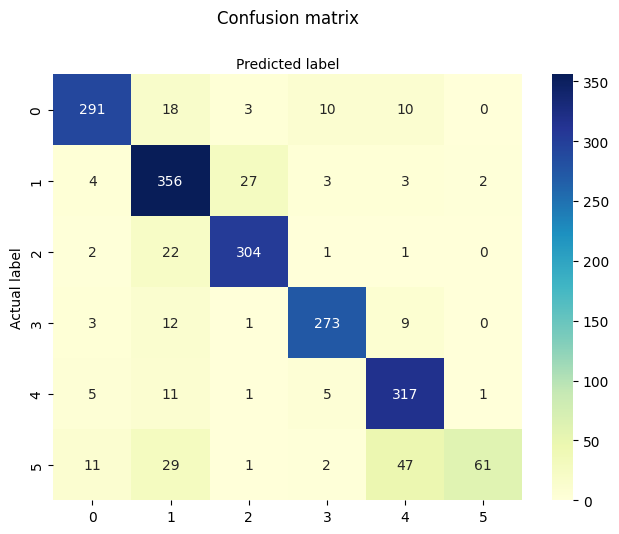

In [75]:
confusion_matrix(cnf_matrix)

In [76]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.88      0.90       332
     Sadness       0.79      0.90      0.84       395
       Anger       0.90      0.92      0.91       330
        Fear       0.93      0.92      0.92       298
        Love       0.82      0.93      0.87       340
   Surprised       0.95      0.40      0.57       151

    accuracy                           0.87      1846
   macro avg       0.89      0.83      0.84      1846
weighted avg       0.88      0.87      0.86      1846



##### TfidfVectorizer -- Bigram(n3)





In [77]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [78]:
y_pred = NB_model(X_train, y_train, X_test)

In [79]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[124 171   3  12  22   0]
 [  1 367  12   3  12   0]
 [  1 178 137   5   9   0]
 [  2 131   0 151  14   0]
 [  0 101   2   7 228   2]
 [  1  84   0   1  40  25]]


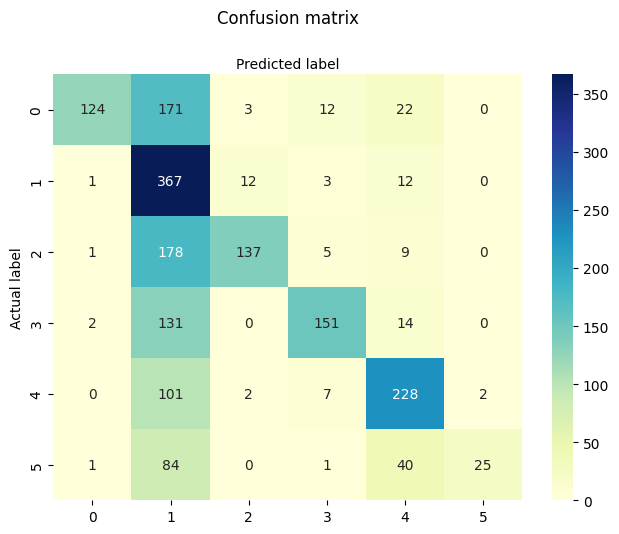

In [80]:
confusion_matrix(cnf_matrix)

In [81]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.96      0.37      0.54       332
     Sadness       0.36      0.93      0.51       395
       Anger       0.89      0.42      0.57       330
        Fear       0.84      0.51      0.63       298
        Love       0.70      0.67      0.69       340
   Surprised       0.93      0.17      0.28       151

    accuracy                           0.56      1846
   macro avg       0.78      0.51      0.54      1846
weighted avg       0.75      0.56      0.56      1846



#### *K-Nearest Neighbor (KNN)*

In [82]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [83]:
def find_optimal_k(X_train, y_train, X_test, y_test):
  # Find the optimal value of k
  max_k = min(15, X_train.shape[0]) # Limit the maximum value of k to avoid overfitting
  best_accuracy = 0
  best_k = 0
  accuracy_values = []
  k_values = []
  for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k = k

  return best_k

In [84]:
def KNN_model(X_train, y_train, X_test, best_k):
  # Train the KNN classifier using the optimal value of k
  scaler = StandardScaler(with_mean=False)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  return y_pred

##### CounterVectorizer - Unigram(n1)

In [85]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [86]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [87]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [88]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[146  47  32  50  43  14]
 [ 57 178  59  58  24  19]
 [ 28  45 185  40  25   7]
 [ 36  45  12 169  26  10]
 [ 30  41  29  41 170  29]
 [ 15  16   4   5  24  87]]


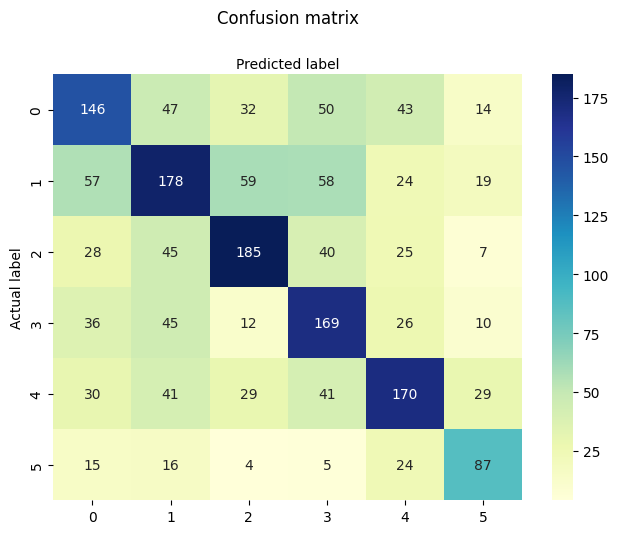

In [89]:
confusion_matrix(cnf_matrix)

In [90]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.47      0.44      0.45       332
     Sadness       0.48      0.45      0.46       395
       Anger       0.58      0.56      0.57       330
        Fear       0.47      0.57      0.51       298
        Love       0.54      0.50      0.52       340
   Surprised       0.52      0.58      0.55       151

    accuracy                           0.51      1846
   macro avg       0.51      0.52      0.51      1846
weighted avg       0.51      0.51      0.51      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [91]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [92]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [93]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[125 111   8  50  30   8]
 [ 35 246  34  46  25   9]
 [ 22  76 150  59  15   8]
 [ 20  77   7 161  24   9]
 [ 16  78  10  45 166  25]
 [  7  27   5  17  23  72]]


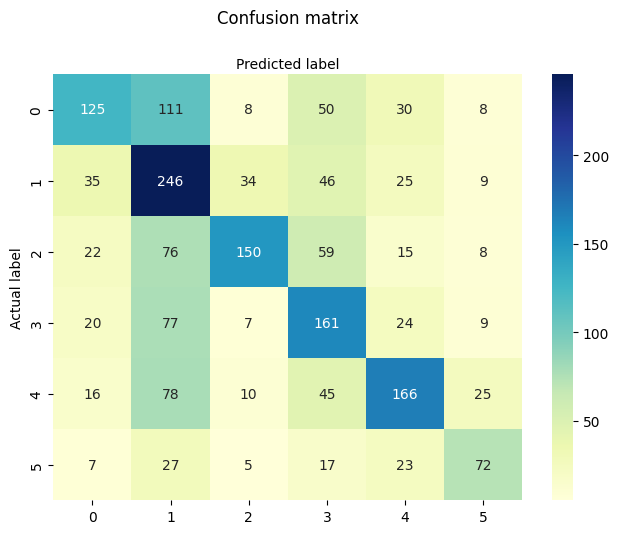

In [95]:
confusion_matrix(cnf_matrix)

In [96]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.56      0.38      0.45       332
     Sadness       0.40      0.62      0.49       395
       Anger       0.70      0.45      0.55       330
        Fear       0.43      0.54      0.48       298
        Love       0.59      0.49      0.53       340
   Surprised       0.55      0.48      0.51       151

    accuracy                           0.50      1846
   macro avg       0.54      0.49      0.50      1846
weighted avg       0.53      0.50      0.50      1846



##### CounterVectorizer -- Bigram(n3)

In [97]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [98]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [99]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [100]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[108  10   5  24 185   0]
 [ 63  72  13  10 236   1]
 [ 59  15  86  11 158   1]
 [ 26  10   6 125 131   0]
 [ 28  18   7  22 249  16]
 [ 15   9   2  27  57  41]]


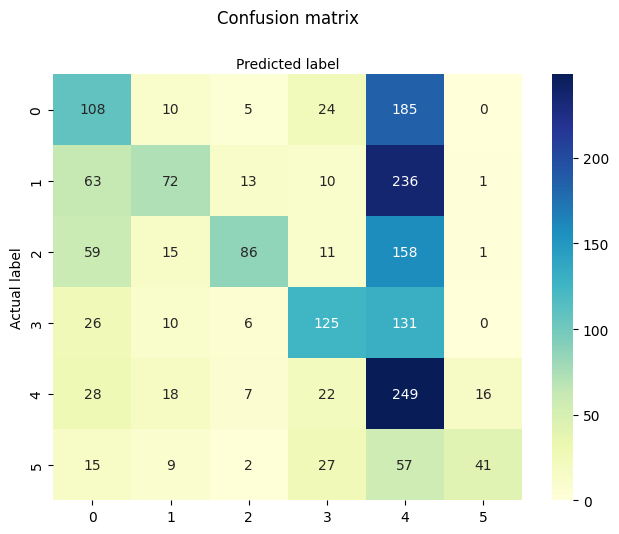

In [101]:
confusion_matrix(cnf_matrix)

In [102]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.36      0.33      0.34       332
     Sadness       0.54      0.18      0.27       395
       Anger       0.72      0.26      0.38       330
        Fear       0.57      0.42      0.48       298
        Love       0.25      0.73      0.37       340
   Surprised       0.69      0.27      0.39       151

    accuracy                           0.37      1846
   macro avg       0.52      0.37      0.37      1846
weighted avg       0.50      0.37      0.37      1846



##### TfidfVectorizer -- Unigram(n1)

In [103]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [104]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [105]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [106]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[266  18  14  15  19   0]
 [ 25 295  42  10  16   7]
 [ 13  27 262  13  13   2]
 [ 21  15  18 224  18   2]
 [ 10  27  12  17 258  16]
 [ 14  11   6   9  19  92]]


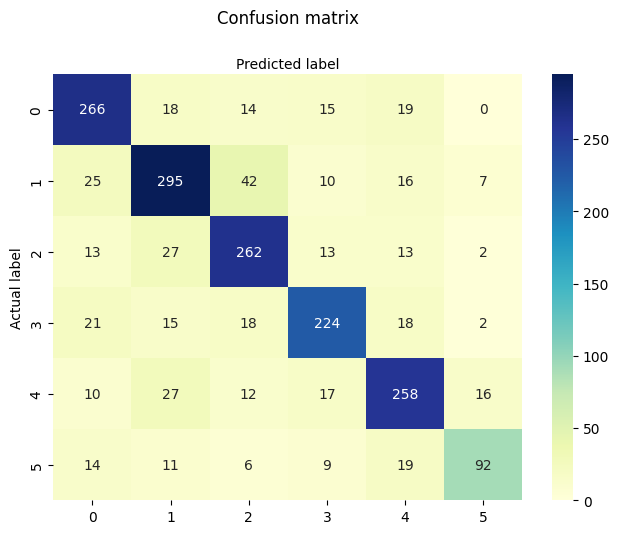

In [107]:
confusion_matrix(cnf_matrix)

In [108]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.76      0.80      0.78       332
     Sadness       0.75      0.75      0.75       395
       Anger       0.74      0.79      0.77       330
        Fear       0.78      0.75      0.76       298
        Love       0.75      0.76      0.76       340
   Surprised       0.77      0.61      0.68       151

    accuracy                           0.76      1846
   macro avg       0.76      0.74      0.75      1846
weighted avg       0.76      0.76      0.76      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [109]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [110]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [111]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [112]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[261  18  12  19  22   0]
 [ 34 281  36  12  25   7]
 [ 19  28 252  11  20   0]
 [ 17  17  12 229  22   1]
 [ 12  20   6  17 272  13]
 [ 16  14   4   6  25  86]]


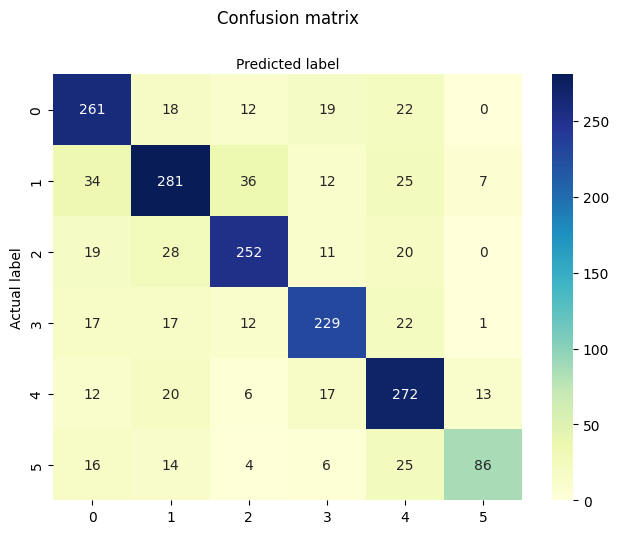

In [113]:
confusion_matrix(cnf_matrix)

In [114]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.73      0.79      0.76       332
     Sadness       0.74      0.71      0.73       395
       Anger       0.78      0.76      0.77       330
        Fear       0.78      0.77      0.77       298
        Love       0.70      0.80      0.75       340
   Surprised       0.80      0.57      0.67       151

    accuracy                           0.75      1846
   macro avg       0.76      0.73      0.74      1846
weighted avg       0.75      0.75      0.75      1846



##### TfidfVectorizer -- Bigram(n3)

In [115]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [116]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [117]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [118]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[143  43  19  65  62   0]
 [ 15 250  29  47  52   2]
 [  9  77 158  48  37   1]
 [  7  39  12 209  31   0]
 [  7  37   8  42 243   3]
 [  3  19   8  20  46  55]]


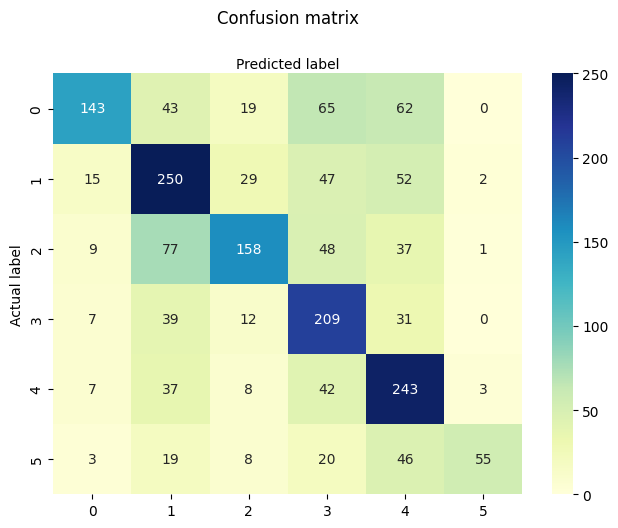

In [119]:
confusion_matrix(cnf_matrix)

In [120]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.78      0.43      0.55       332
     Sadness       0.54      0.63      0.58       395
       Anger       0.68      0.48      0.56       330
        Fear       0.48      0.70      0.57       298
        Love       0.52      0.71      0.60       340
   Surprised       0.90      0.36      0.52       151

    accuracy                           0.57      1846
   macro avg       0.65      0.55      0.56      1846
weighted avg       0.62      0.57      0.57      1846



#### *Logistic Regression*

In [121]:
# import LR model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [122]:
def LR_model(X_train, y_train, X_test, max_iter=1000):
  # Model Selection & Hyperparameter Tuning
  param_grid = {'C': [0.1, 0.5, 1, 2, 5]}
  logreg = LogisticRegression(random_state=16, max_iter=max_iter)
  grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  y_pred = grid_search.best_estimator_.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [123]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [124]:
y_pred = LR_model(X_train, y_train, X_test)

In [125]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[277  17   5  18  13   2]
 [ 13 331  30   6   9   6]
 [  3  24 295   6   1   1]
 [ 11   7   4 264  10   2]
 [  8  11   3   9 285  24]
 [  5   3   0   3  27 113]]


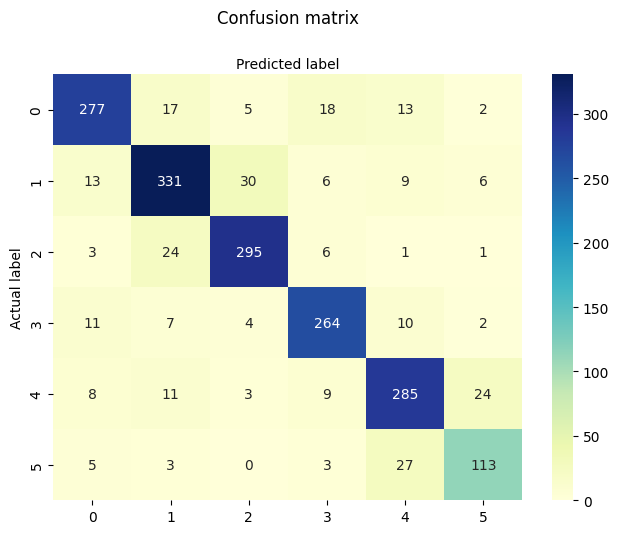

In [126]:
confusion_matrix(cnf_matrix)

In [127]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.87      0.83      0.85       332
     Sadness       0.84      0.84      0.84       395
       Anger       0.88      0.89      0.88       330
        Fear       0.86      0.89      0.87       298
        Love       0.83      0.84      0.83       340
   Surprised       0.76      0.75      0.76       151

    accuracy                           0.85      1846
   macro avg       0.84      0.84      0.84      1846
weighted avg       0.85      0.85      0.85      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [128]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [129]:
y_pred = LR_model(X_train, y_train, X_test)

In [130]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[278  18   7  16  12   1]
 [  7 337  28   7   9   7]
 [  2  17 307   4   0   0]
 [ 12   9   2 268   6   1]
 [  8  10   4   7 289  22]
 [  2   6   0   2  29 112]]


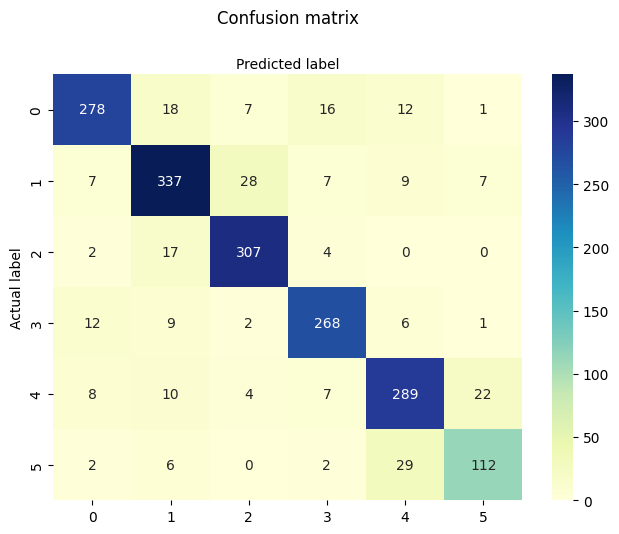

In [131]:
confusion_matrix(cnf_matrix)

In [132]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.84      0.87       332
     Sadness       0.85      0.85      0.85       395
       Anger       0.88      0.93      0.91       330
        Fear       0.88      0.90      0.89       298
        Love       0.84      0.85      0.84       340
   Surprised       0.78      0.74      0.76       151

    accuracy                           0.86      1846
   macro avg       0.86      0.85      0.85      1846
weighted avg       0.86      0.86      0.86      1846



##### CounterVectorizer -- Bigram(n3)

In [133]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [134]:
y_pred = LR_model(X_train, y_train, X_test)

In [135]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[220  51  22  23  16   0]
 [ 40 276  32  23  22   2]
 [ 19  83 193  19  16   0]
 [ 22  50  13 190  23   0]
 [ 21  38   7  27 234  13]
 [  5  22   8  15  28  73]]


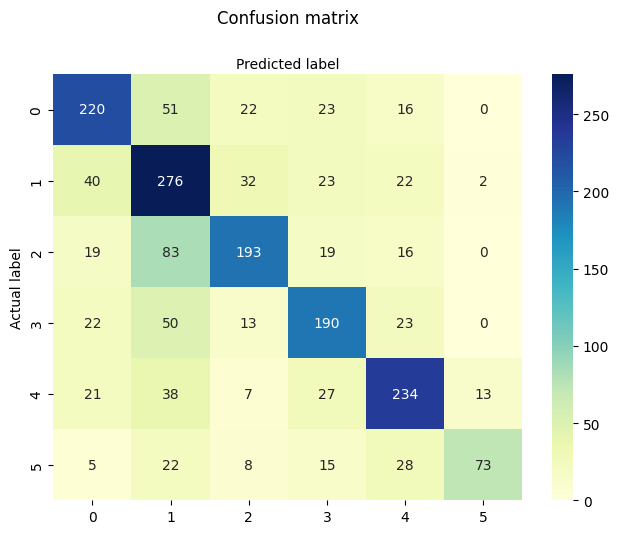

In [136]:
confusion_matrix(cnf_matrix)

In [137]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.67      0.66      0.67       332
     Sadness       0.53      0.70      0.60       395
       Anger       0.70      0.58      0.64       330
        Fear       0.64      0.64      0.64       298
        Love       0.69      0.69      0.69       340
   Surprised       0.83      0.48      0.61       151

    accuracy                           0.64      1846
   macro avg       0.68      0.63      0.64      1846
weighted avg       0.66      0.64      0.64      1846



##### TfidfVectorizer -- Unigram(n1)

In [138]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [139]:
y_pred = LR_model(X_train, y_train, X_test)

In [140]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[270  27   5  16  13   1]
 [  9 342  27   6   6   5]
 [  4  22 294   7   2   1]
 [  9   9   4 267   8   1]
 [  9  16   3  13 283  16]
 [  6   9   0   3  31 102]]


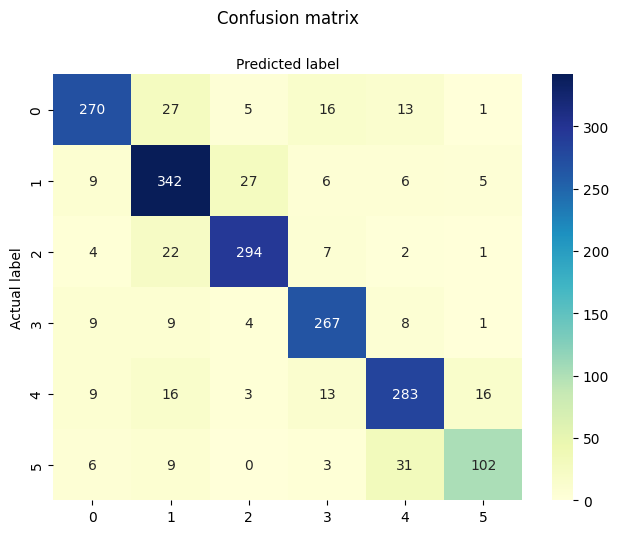

In [141]:
confusion_matrix(cnf_matrix)

In [142]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.81      0.85       332
     Sadness       0.80      0.87      0.83       395
       Anger       0.88      0.89      0.89       330
        Fear       0.86      0.90      0.88       298
        Love       0.83      0.83      0.83       340
   Surprised       0.81      0.68      0.74       151

    accuracy                           0.84      1846
   macro avg       0.84      0.83      0.83      1846
weighted avg       0.84      0.84      0.84      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [143]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [144]:
y_pred = LR_model(X_train, y_train, X_test)

In [145]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[275  28   5  13  11   0]
 [  6 345  27   7   6   4]
 [  3  22 299   4   2   0]
 [ 10  17   2 261   7   1]
 [ 10  15   5   8 295   7]
 [  7  14   1   3  35  91]]


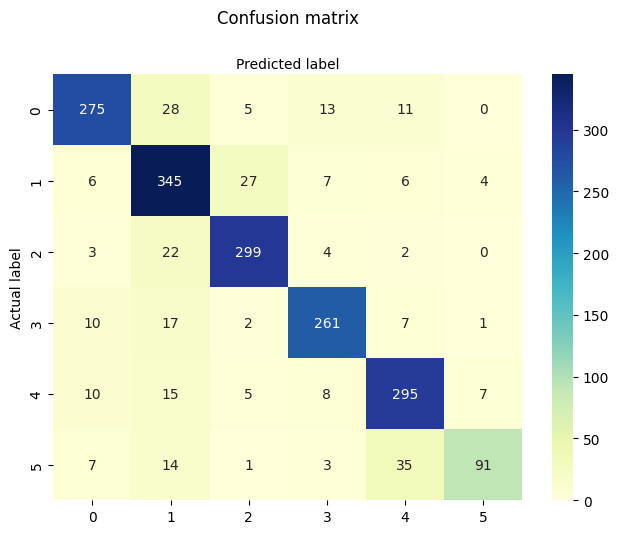

In [146]:
confusion_matrix(cnf_matrix)

In [147]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.83      0.86       332
     Sadness       0.78      0.87      0.83       395
       Anger       0.88      0.91      0.89       330
        Fear       0.88      0.88      0.88       298
        Love       0.83      0.87      0.85       340
   Surprised       0.88      0.60      0.72       151

    accuracy                           0.85      1846
   macro avg       0.86      0.83      0.84      1846
weighted avg       0.85      0.85      0.85      1846



##### TfidfVectorizer -- Bigram(n3)

In [148]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [149]:
y_pred = LR_model(X_train, y_train, X_test)

In [150]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[207  67  24  18  16   0]
 [ 30 293  31  19  20   2]
 [ 15  94 193  17  11   0]
 [ 18  61  13 190  16   0]
 [ 14  53  11  20 236   6]
 [  5  39  11  13  39  44]]


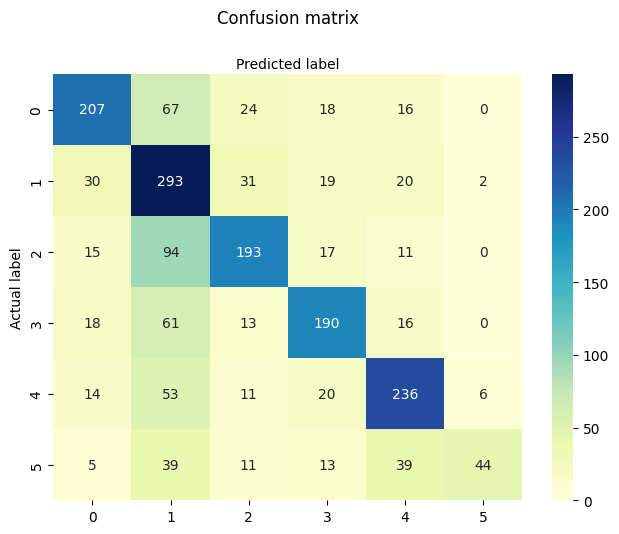

In [151]:
confusion_matrix(cnf_matrix)

In [152]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.72      0.62      0.67       332
     Sadness       0.48      0.74      0.58       395
       Anger       0.68      0.58      0.63       330
        Fear       0.69      0.64      0.66       298
        Love       0.70      0.69      0.70       340
   Surprised       0.85      0.29      0.43       151

    accuracy                           0.63      1846
   macro avg       0.69      0.60      0.61      1846
weighted avg       0.66      0.63      0.63      1846



#### *Support Vector Machines (SVM)*

In [153]:
# import SVM model
from sklearn import svm

In [154]:
def SVM_model(X_train, y_train, X_test):
  # create a svm Classifier
  svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

  # train the model using the training sets
  svm_classifier.fit(X_train, y_train)

  y_pred = svm_classifier.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [155]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [156]:
y_pred = SVM_model(X_train, y_train, X_test)

In [157]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[284  15   4  17  10   2]
 [ 15 321  38   5  10   6]
 [  8  24 285   7   3   3]
 [ 10   7   4 267   8   2]
 [ 12  11   3  11 282  21]
 [  3   5   0   3  18 122]]


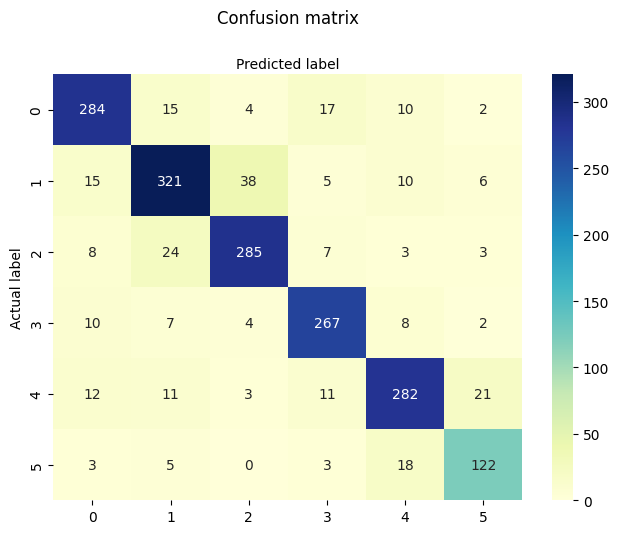

In [158]:
confusion_matrix(cnf_matrix)

In [159]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.86      0.86      0.86       332
     Sadness       0.84      0.81      0.83       395
       Anger       0.85      0.86      0.86       330
        Fear       0.86      0.90      0.88       298
        Love       0.85      0.83      0.84       340
   Surprised       0.78      0.81      0.79       151

    accuracy                           0.85      1846
   macro avg       0.84      0.84      0.84      1846
weighted avg       0.85      0.85      0.85      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [160]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [161]:
y_pred = SVM_model(X_train, y_train, X_test)

In [162]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[286  15   5  14  11   1]
 [  9 333  32   5  10   6]
 [  4  15 304   3   1   3]
 [  7  12   3 269   5   2]
 [  5   9   6  14 282  24]
 [  4   3   1   1  26 116]]


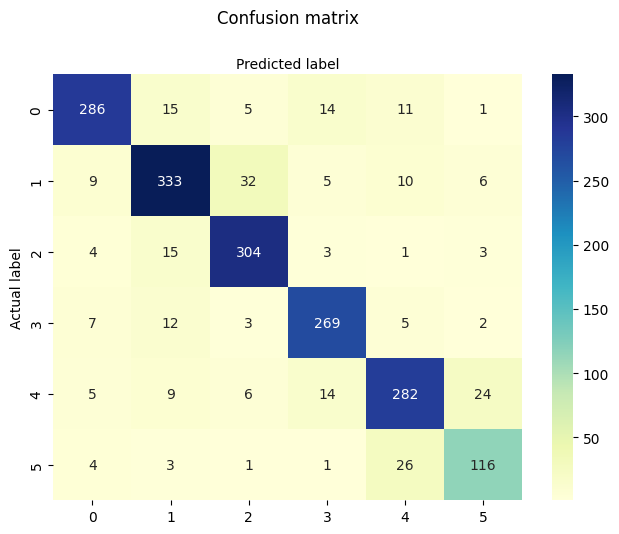

In [163]:
confusion_matrix(cnf_matrix)

In [164]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.86      0.88       332
     Sadness       0.86      0.84      0.85       395
       Anger       0.87      0.92      0.89       330
        Fear       0.88      0.90      0.89       298
        Love       0.84      0.83      0.84       340
   Surprised       0.76      0.77      0.77       151

    accuracy                           0.86      1846
   macro avg       0.85      0.85      0.85      1846
weighted avg       0.86      0.86      0.86      1846



##### CounterVectorizer -- Bigram(n3)

In [165]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [166]:
y_pred = SVM_model(X_train, y_train, X_test)

In [167]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[219  50  19  25  19   0]
 [ 48 279  30  17  19   2]
 [ 23  92 178  19  17   1]
 [ 20  52  13 191  22   0]
 [ 16  43   7  24 236  14]
 [  3  22   7  15  36  68]]


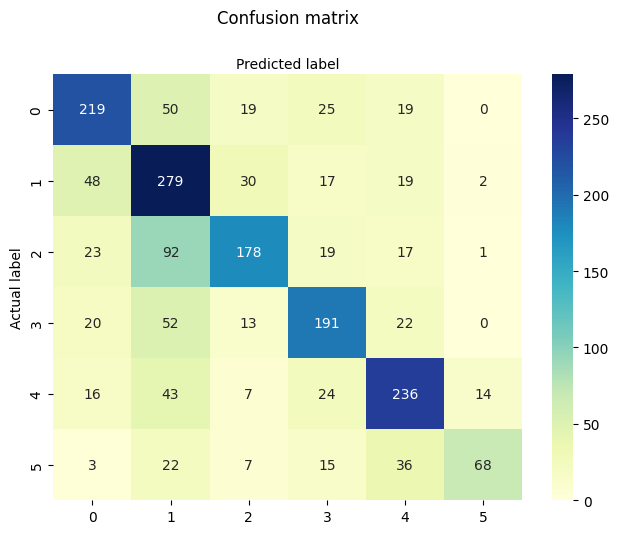

In [168]:
confusion_matrix(cnf_matrix)

In [169]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.67      0.66      0.66       332
     Sadness       0.52      0.71      0.60       395
       Anger       0.70      0.54      0.61       330
        Fear       0.66      0.64      0.65       298
        Love       0.68      0.69      0.69       340
   Surprised       0.80      0.45      0.58       151

    accuracy                           0.63      1846
   macro avg       0.67      0.62      0.63      1846
weighted avg       0.65      0.63      0.63      1846



##### TfidfVectorizer -- Unigram(n1)

In [170]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [171]:
y_pred = SVM_model(X_train, y_train, X_test)

In [172]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[272  26   6  15  11   2]
 [ 13 328  34   6   9   5]
 [  4  16 300   6   2   2]
 [  8  11   5 265   7   2]
 [  9  20   4  12 281  14]
 [  2   6   0   3  27 113]]


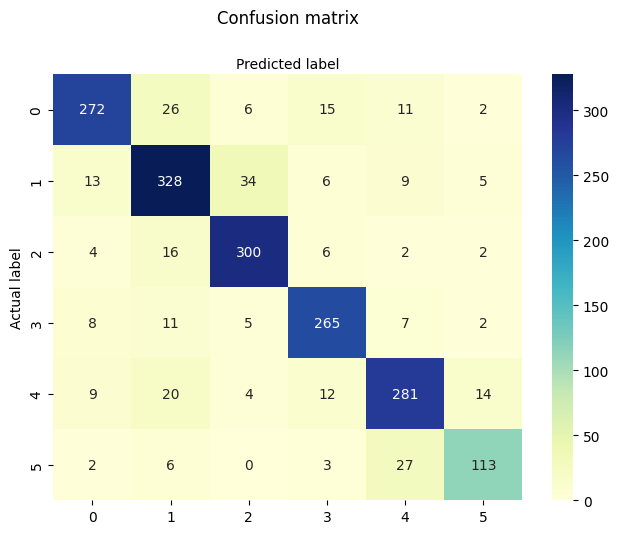

In [173]:
confusion_matrix(cnf_matrix)

In [174]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.82      0.85       332
     Sadness       0.81      0.83      0.82       395
       Anger       0.86      0.91      0.88       330
        Fear       0.86      0.89      0.88       298
        Love       0.83      0.83      0.83       340
   Surprised       0.82      0.75      0.78       151

    accuracy                           0.84      1846
   macro avg       0.84      0.84      0.84      1846
weighted avg       0.84      0.84      0.84      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [175]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [176]:
y_pred = SVM_model(X_train, y_train, X_test)

In [177]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[273  29   6  13  11   0]
 [  5 346  29   6   4   5]
 [  6  19 299   4   1   1]
 [  8  20   2 262   5   1]
 [  6  12   6   9 303   4]
 [  6  14   1   2  35  93]]


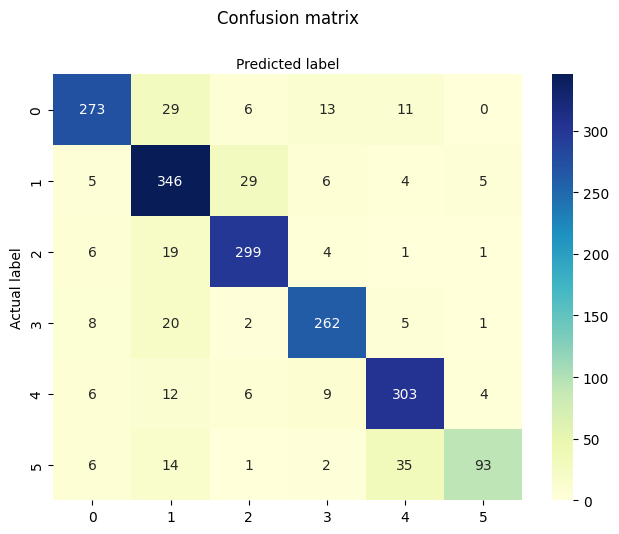

In [178]:
confusion_matrix(cnf_matrix)

In [179]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.82      0.86       332
     Sadness       0.79      0.88      0.83       395
       Anger       0.87      0.91      0.89       330
        Fear       0.89      0.88      0.88       298
        Love       0.84      0.89      0.87       340
   Surprised       0.89      0.62      0.73       151

    accuracy                           0.85      1846
   macro avg       0.86      0.83      0.84      1846
weighted avg       0.86      0.85      0.85      1846



##### TfidfVectorizer -- Bigram(n3)

In [180]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [181]:
y_pred = SVM_model(X_train, y_train, X_test)

In [182]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[200  79  21  16  16   0]
 [ 30 310  24  14  15   2]
 [ 14 111 184  10  11   0]
 [ 16  73  10 185  14   0]
 [ 10  67   9  18 233   3]
 [  7  46  10   7  37  44]]


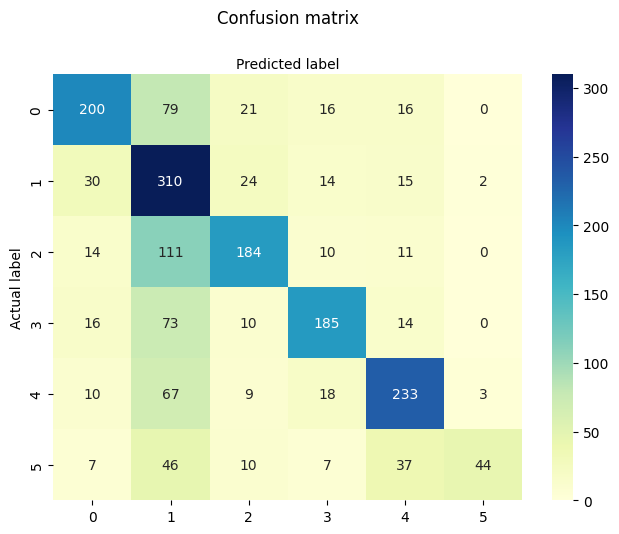

In [183]:
confusion_matrix(cnf_matrix)

In [184]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.72      0.60      0.66       332
     Sadness       0.45      0.78      0.57       395
       Anger       0.71      0.56      0.63       330
        Fear       0.74      0.62      0.68       298
        Love       0.71      0.69      0.70       340
   Surprised       0.90      0.29      0.44       151

    accuracy                           0.63      1846
   macro avg       0.71      0.59      0.61      1846
weighted avg       0.68      0.63      0.63      1846



#### *Decision Tree*

In [185]:
# import DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [255]:
def DT_model(X_train, y_train, X_test):
  # define the parameter grid
  param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

  # create a decision tree classifier
  dt = DecisionTreeClassifier()

  # perform grid search
  grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # get the best parameters
  best_params = grid_search.best_params_

  # train the model using the best parameters
  dt = DecisionTreeClassifier(max_depth=best_params['max_depth'])
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [187]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [188]:
y_pred = DT_model(X_train, y_train, X_test)

In [189]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[274  21   8  14  13   2]
 [ 15 310  45   6  13   6]
 [  4  22 291   8   2   3]
 [  9  10   5 260  13   1]
 [  3   6   6   9 299  17]
 [  0   4   1   1  30 115]]


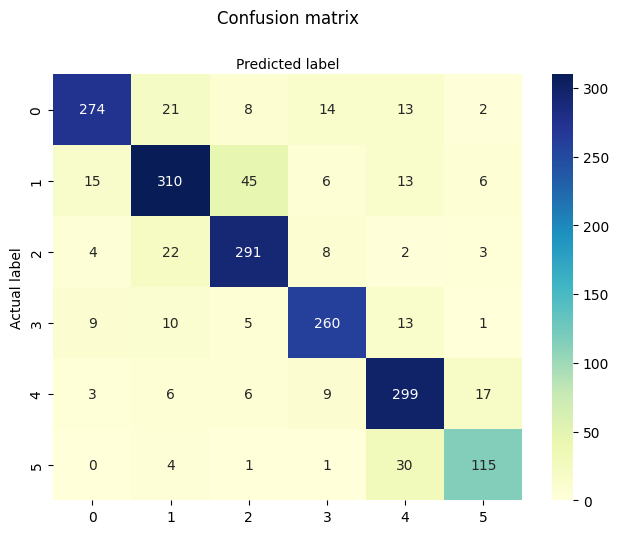

In [190]:
confusion_matrix(cnf_matrix)

In [191]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.83      0.86       332
     Sadness       0.83      0.78      0.81       395
       Anger       0.82      0.88      0.85       330
        Fear       0.87      0.87      0.87       298
        Love       0.81      0.88      0.84       340
   Surprised       0.80      0.76      0.78       151

    accuracy                           0.84      1846
   macro avg       0.84      0.83      0.84      1846
weighted avg       0.84      0.84      0.84      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [192]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [193]:
y_pred = DT_model(X_train, y_train, X_test)

In [194]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[274  26   7  12  11   2]
 [ 17 312  42   6  13   5]
 [  7  23 287   7   3   3]
 [ 10   8   7 258  15   0]
 [  4   3   6  11 292  24]
 [  0   4   1   0  26 120]]


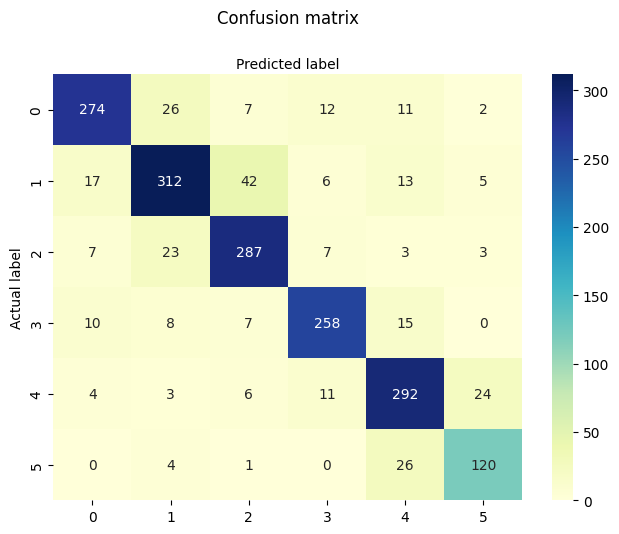

In [195]:
confusion_matrix(cnf_matrix)

In [196]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.83      0.85       332
     Sadness       0.83      0.79      0.81       395
       Anger       0.82      0.87      0.84       330
        Fear       0.88      0.87      0.87       298
        Love       0.81      0.86      0.83       340
   Surprised       0.78      0.79      0.79       151

    accuracy                           0.84      1846
   macro avg       0.83      0.83      0.83      1846
weighted avg       0.84      0.84      0.84      1846



##### CounterVectorizer -- Bigram(n3)

In [197]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [198]:
y_pred = DT_model(X_train, y_train, X_test)

In [199]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[176  55  19  64  16   2]
 [ 25 230  32  97   7   4]
 [ 13  77 165  62  10   3]
 [ 12  29  16 230  11   0]
 [ 12  39   7  47 221  14]
 [  8  15   8  22  23  75]]


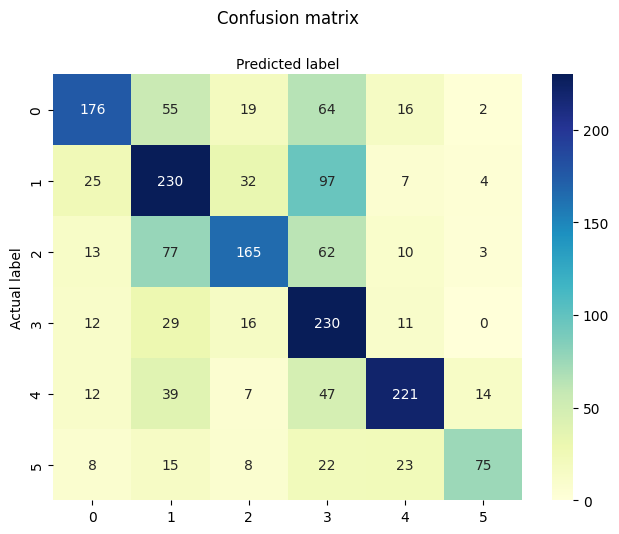

In [200]:
confusion_matrix(cnf_matrix)

In [201]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.72      0.53      0.61       332
     Sadness       0.52      0.58      0.55       395
       Anger       0.67      0.50      0.57       330
        Fear       0.44      0.77      0.56       298
        Love       0.77      0.65      0.70       340
   Surprised       0.77      0.50      0.60       151

    accuracy                           0.59      1846
   macro avg       0.65      0.59      0.60      1846
weighted avg       0.63      0.59      0.60      1846



##### TfidfVectorizer -- Unigram(n1)

In [256]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [257]:
y_pred = DT_model(X_train, y_train, X_test)

In [258]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[272  24   9  11  14   2]
 [ 19 309  39   8  13   7]
 [  3  16 298   7   2   4]
 [ 15  11  10 246  15   1]
 [  3   8   7   9 294  19]
 [  0   4   1   0  23 123]]


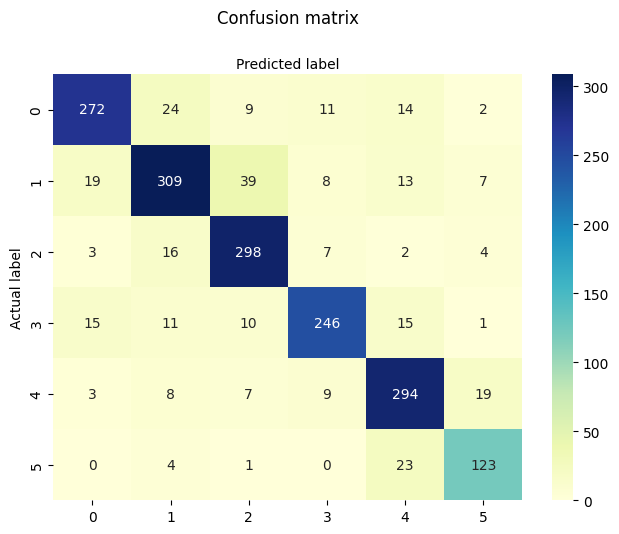

In [259]:
confusion_matrix(cnf_matrix)

In [260]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.87      0.82      0.84       332
     Sadness       0.83      0.78      0.81       395
       Anger       0.82      0.90      0.86       330
        Fear       0.88      0.83      0.85       298
        Love       0.81      0.86      0.84       340
   Surprised       0.79      0.81      0.80       151

    accuracy                           0.84      1846
   macro avg       0.83      0.83      0.83      1846
weighted avg       0.84      0.84      0.84      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [261]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [262]:
y_pred = DT_model(X_train, y_train, X_test)

In [263]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[275  26   6  11  12   2]
 [ 21 307  38   8  12   9]
 [  1  20 295   7   4   3]
 [  9  11   8 253  16   1]
 [  3  10   7   9 297  14]
 [  1   3   1   0  29 117]]


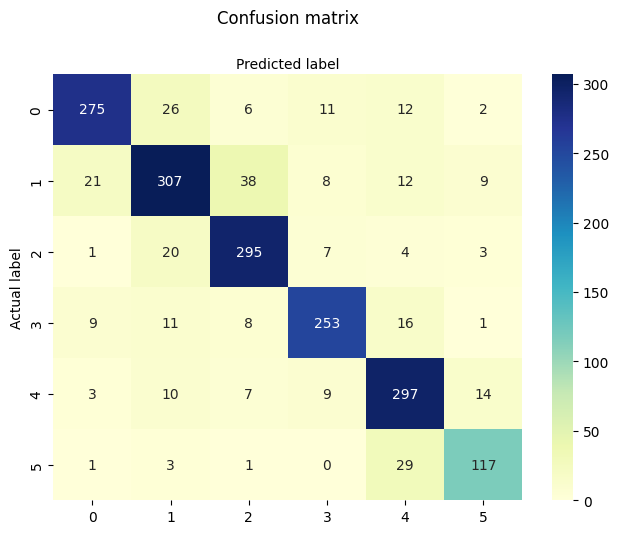

In [264]:
confusion_matrix(cnf_matrix)

In [265]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.83      0.86       332
     Sadness       0.81      0.78      0.80       395
       Anger       0.83      0.89      0.86       330
        Fear       0.88      0.85      0.86       298
        Love       0.80      0.87      0.84       340
   Surprised       0.80      0.77      0.79       151

    accuracy                           0.84      1846
   macro avg       0.84      0.83      0.83      1846
weighted avg       0.84      0.84      0.84      1846



##### TfidfVectorizer -- Bigram(n3)

In [212]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [213]:
y_pred = DT_model(X_train, y_train, X_test)

In [214]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[164  42  22  75  27   2]
 [ 30 200  34 109  13   9]
 [ 23  52 160  79  13   3]
 [ 12  29  14 222  18   3]
 [ 11  30  10  57 211  21]
 [  5  17   7  27  24  71]]


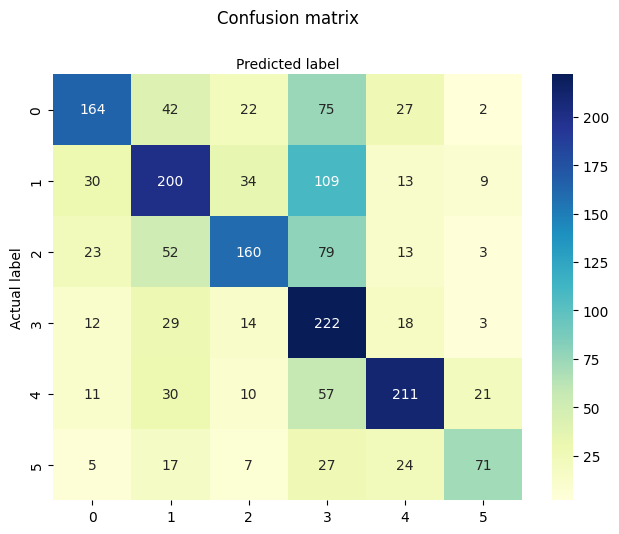

In [215]:
confusion_matrix(cnf_matrix)

In [216]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.67      0.49      0.57       332
     Sadness       0.54      0.51      0.52       395
       Anger       0.65      0.48      0.55       330
        Fear       0.39      0.74      0.51       298
        Love       0.69      0.62      0.65       340
   Surprised       0.65      0.47      0.55       151

    accuracy                           0.56      1846
   macro avg       0.60      0.55      0.56      1846
weighted avg       0.60      0.56      0.56      1846



#### *Random Forest*

In [217]:
# import RF model
from sklearn.ensemble import RandomForestClassifier

In [218]:
def RF_model(X_train, y_train, X_test):
  # instantiate the model
  rf = RandomForestClassifier()

  # fit the model with data
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [219]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [220]:
y_pred = RF_model(X_train, y_train, X_test)

In [221]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[273  21   9  15  13   1]
 [ 11 317  44   5  10   8]
 [  3   5 314   5   1   2]
 [ 11  10   6 260  10   1]
 [  3   3   4   9 300  21]
 [  1   4   1   1  21 123]]


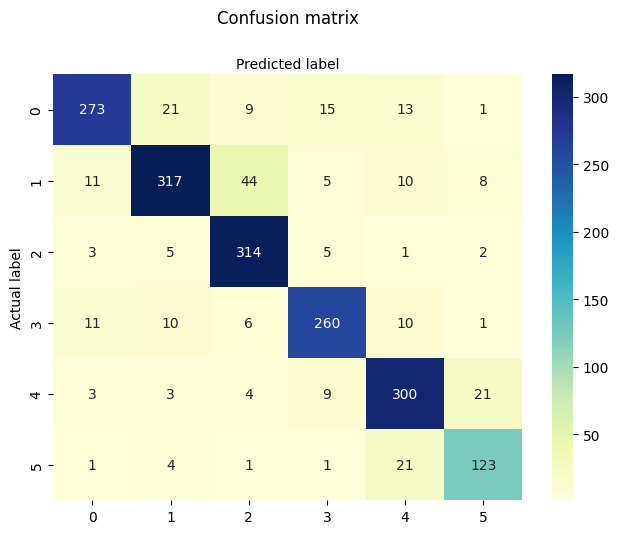

In [222]:
confusion_matrix(cnf_matrix)

In [223]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.82      0.86       332
     Sadness       0.88      0.80      0.84       395
       Anger       0.83      0.95      0.89       330
        Fear       0.88      0.87      0.88       298
        Love       0.85      0.88      0.86       340
   Surprised       0.79      0.81      0.80       151

    accuracy                           0.86      1846
   macro avg       0.86      0.86      0.85      1846
weighted avg       0.86      0.86      0.86      1846



##### CounterVectorizer -- Unigram and Bigram(n2)



In [224]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [225]:
y_pred = RF_model(X_train, y_train, X_test)

In [226]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  18   7  13  11   0]
 [ 11 326  36   6  10   6]
 [  2  12 312   3   1   0]
 [  5   9   2 276   6   0]
 [  6   4   2   9 300  19]
 [  2   1   0   2  27 119]]


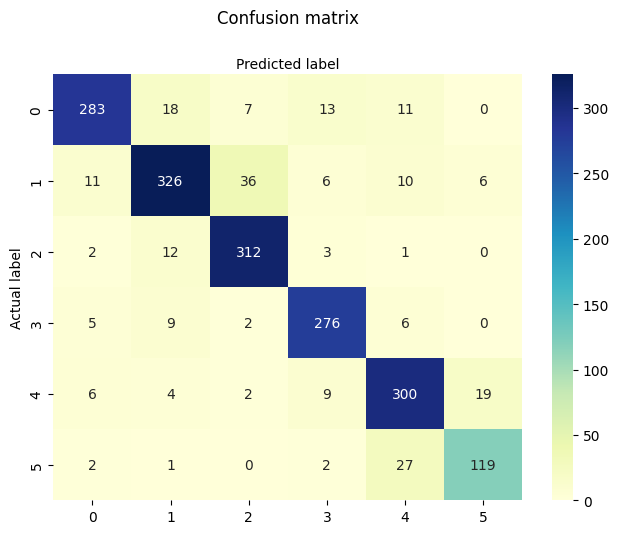

In [227]:
confusion_matrix(cnf_matrix)

In [228]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.85      0.88       332
     Sadness       0.88      0.83      0.85       395
       Anger       0.87      0.95      0.91       330
        Fear       0.89      0.93      0.91       298
        Love       0.85      0.88      0.86       340
   Surprised       0.83      0.79      0.81       151

    accuracy                           0.88      1846
   macro avg       0.87      0.87      0.87      1846
weighted avg       0.88      0.88      0.87      1846



##### CounterVectorizer -- Bigram(n3)

In [229]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [230]:
y_pred = RF_model(X_train, y_train, X_test)

In [231]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[169  58   9  34  62   0]
 [ 14 250  15  23  91   2]
 [  7  90 158  29  45   1]
 [ 15  35   4 193  51   0]
 [ 10  44   1  27 243  15]
 [  6  19   1  15  28  82]]


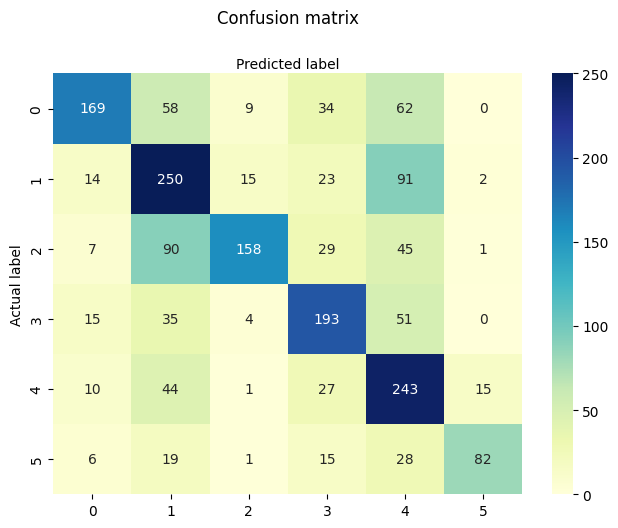

In [232]:
confusion_matrix(cnf_matrix)

In [233]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.76      0.51      0.61       332
     Sadness       0.50      0.63      0.56       395
       Anger       0.84      0.48      0.61       330
        Fear       0.60      0.65      0.62       298
        Love       0.47      0.71      0.57       340
   Surprised       0.82      0.54      0.65       151

    accuracy                           0.59      1846
   macro avg       0.67      0.59      0.60      1846
weighted avg       0.65      0.59      0.60      1846



##### TfidfVectorizer -- Unigram(n1)

In [234]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [235]:
y_pred = RF_model(X_train, y_train, X_test)

In [236]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[269  26   8  16  12   1]
 [ 11 326  36   6  10   6]
 [  0  10 313   5   1   1]
 [ 12  13   7 252  13   1]
 [  4   7   5   7 292  25]
 [  0   3   1   2  17 128]]


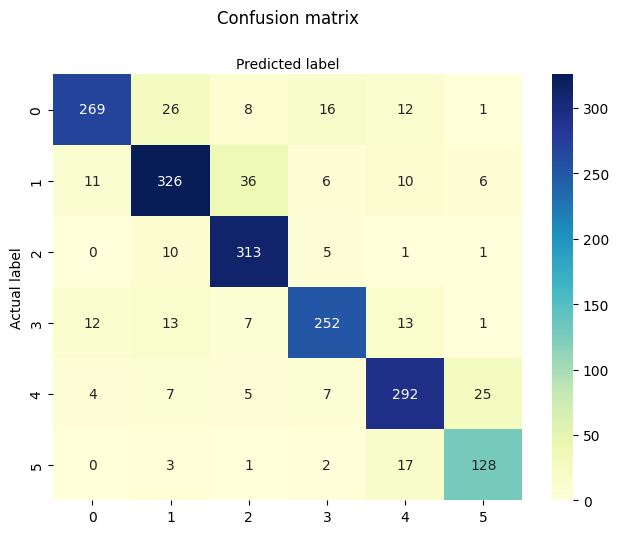

In [237]:
confusion_matrix(cnf_matrix)

In [238]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.81      0.86       332
     Sadness       0.85      0.83      0.84       395
       Anger       0.85      0.95      0.89       330
        Fear       0.88      0.85      0.86       298
        Love       0.85      0.86      0.85       340
   Surprised       0.79      0.85      0.82       151

    accuracy                           0.86      1846
   macro avg       0.85      0.86      0.85      1846
weighted avg       0.86      0.86      0.86      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [239]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [240]:
y_pred = RF_model(X_train, y_train, X_test)

In [241]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[267  29   6  15  14   1]
 [  8 335  33   5   9   5]
 [  2  16 308   3   1   0]
 [ 13  13   6 254  11   1]
 [  2   9   4   6 304  15]
 [  1   5   0   2  21 122]]


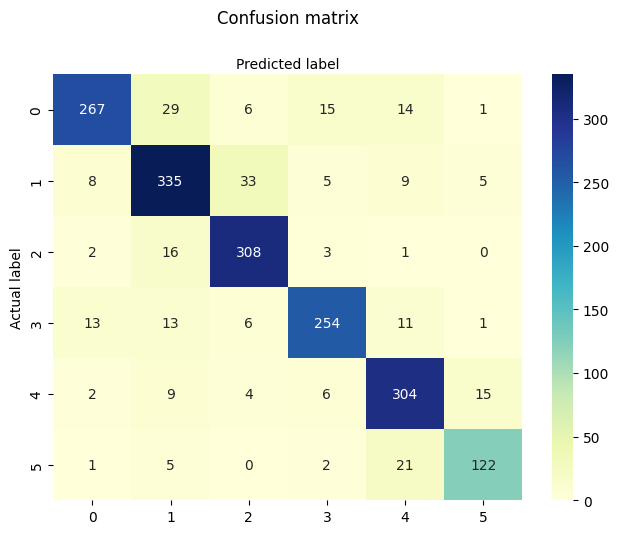

In [242]:
confusion_matrix(cnf_matrix)

In [243]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.80      0.85       332
     Sadness       0.82      0.85      0.84       395
       Anger       0.86      0.93      0.90       330
        Fear       0.89      0.85      0.87       298
        Love       0.84      0.89      0.87       340
   Surprised       0.85      0.81      0.83       151

    accuracy                           0.86      1846
   macro avg       0.86      0.86      0.86      1846
weighted avg       0.86      0.86      0.86      1846



##### TfidfVectorizer -- Bigram(n3)

In [244]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [245]:
y_pred = RF_model(X_train, y_train, X_test)

In [246]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[158  58  17  31  67   1]
 [  7 242  22  26  96   2]
 [  5  68 181  26  50   0]
 [  5  48   8 181  56   0]
 [  7  41  10  23 245  14]
 [  4  18   6  13  34  76]]


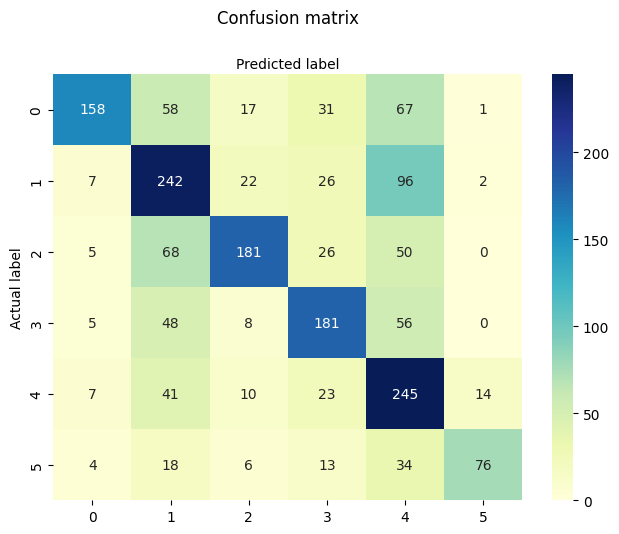

In [247]:
confusion_matrix(cnf_matrix)

In [248]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.85      0.48      0.61       332
     Sadness       0.51      0.61      0.56       395
       Anger       0.74      0.55      0.63       330
        Fear       0.60      0.61      0.61       298
        Love       0.45      0.72      0.55       340
   Surprised       0.82      0.50      0.62       151

    accuracy                           0.59      1846
   macro avg       0.66      0.58      0.60      1846
weighted avg       0.64      0.59      0.59      1846

